In [1]:
import sys
sys.path.append('/mnt/pfs/akash.mishra/ppe_model/')
import numpy as np
import matplotlib.pyplot as plt
import waveform_model
# import pycbc.ppe.ppe_tools as ppe_tools

import pycbc
import bilby
import numpy as np
import matplotlib.pylab as plt
import pycbc.psd
from waveform_model import ppe_c1_eps_model
np.set_printoptions(threshold=sys.maxsize)
import pycbc.waveform as wf

Version 1.1


## GR Waveform

In [2]:
# Common parametrs for both GR and PPE
waveform_arguments = dict(waveform_approximant='IMRPhenomD',reference_frequency=50., minimum_frequency=20.)
sampling_frequency = 2048
duration = 8

delta_f = 1/8
fhigh = 1024
flen = int(fhigh/delta_f) +1
flow = 20

In [3]:
f = np.linspace(0.0, 1024, 4096)
mass_1 = 35
mass_2 = 32
a_1 = 0.5
a_2 = 0.6
tilt_1 = 0.0
tilt_2 = 0.0
luminosity_distance = 400
theta_jn = 0.7
phi_12 = 0.9
phi_jl = 2.1
phase = 0.6
b = -1
beta = -2
delta_eps = -1
hp = ppe_c1_eps_model(f, mass_1, mass_2, a_1, a_2, tilt_1, tilt_2, luminosity_distance, theta_jn, phi_12, phi_jl, phase, b, beta, delta_eps,)['plus']
hc = ppe_c1_eps_model(f, mass_1, mass_2, a_1, a_2, tilt_1, tilt_2, luminosity_distance, theta_jn, phi_12, phi_jl, phase, b, beta, delta_eps,)['cross']

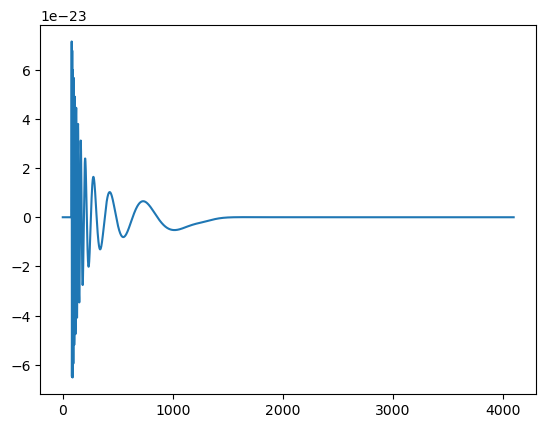

In [5]:
plt.plot(hp)

In [4]:
waveform_generator_gr = bilby.gw.WaveformGenerator(duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,waveform_arguments=waveform_arguments)

00:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [5]:
gr_parameters=dict(mass_1 = 38.3, mass_2 = 33.19, luminosity_distance = 558.553, dec = -1.223, ra = 2.269,theta_jn = 2.921, chi_1 = 0.3, chi_2 = 0.27, psi = 1.575, phase = 1.893,geocent_time = 1126259462.414)

hp_gr_td = waveform_generator_gr.time_domain_strain(parameters=gr_parameters)['plus']
hc_gr_td = waveform_generator_gr.time_domain_strain(parameters=gr_parameters)['cross']
times = waveform_generator_gr.time_array
mask = times>7.5

In [6]:
ppe_params= gr_parameters.copy()
ppe_params['delta_eps'] =-2
ppe_params['alpha'] = 0
ppe_params['a'] = 0
ppe_params['b'] = -1
ppe_params['beta'] = -20
# ppe_params['delta_f'] =delta_f
# ppe_params['f_lower'] =flow
# ppe_params['reference_frequency'] = 50.0
# ppe_params['minimum_frequency'] = ppe_bilby_params['f_lower']

waveform_generator_ppe = bilby.gw.WaveformGenerator(duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=ppe_c1_eps_model,parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,waveform_arguments=waveform_arguments)

hp_ppe_td = waveform_generator_ppe.time_domain_strain(ppe_params)['plus']
hc_ppe_td = waveform_generator_ppe.time_domain_strain(ppe_params)['cross']


00:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveform_model.ppe_c1_eps_model
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


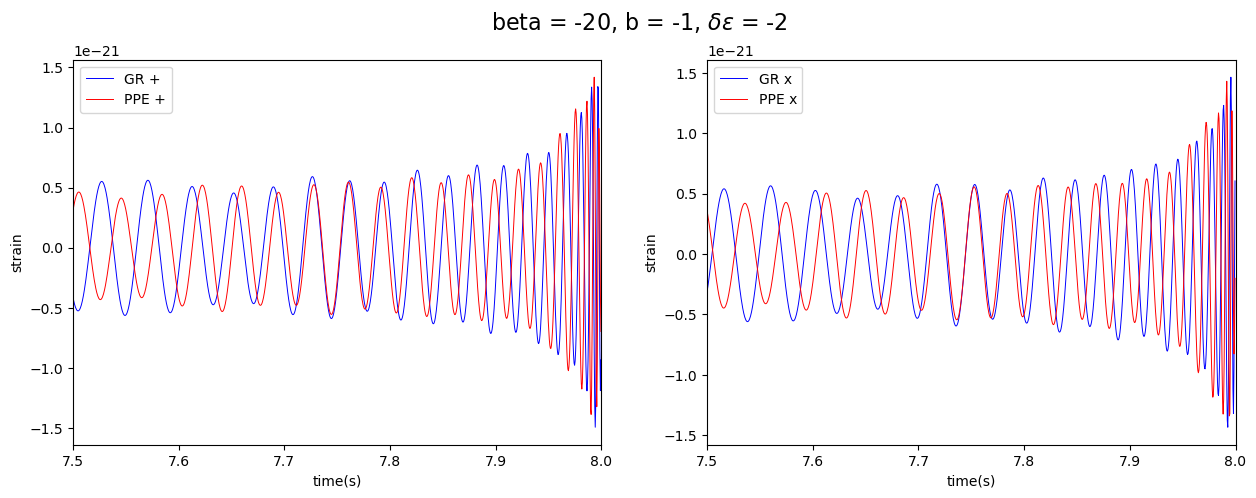

In [7]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle(' beta = '+ str(ppe_params['beta']) + ', b = ' + str(ppe_params['b']) + ', $\delta \epsilon$ = ' + str(ppe_params['delta_eps']), fontsize=16)


ax[0].plot(times, hp_gr_td, 'b-', lw=0.7,label='GR' + ' +')
ax[0].plot(times, hp_ppe_td, 'r', lw=0.7,label='PPE' + ' +')
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('strain')
ax[0].set_xlim([7.5, 8])
ax[0].legend()

ax[1].plot(times, hc_gr_td, 'b-', lw=0.7,label='GR' + ' x')
ax[1].plot(times, hc_ppe_td, 'r', lw=0.7,label='PPE' + ' x')
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('strain')
ax[1].set_xlim([7.5, 8])
ax[1].legend()

In [11]:
asd_file_HL='/mnt/pfs/akash.mishra/ppe_model/Noise/aLIGO_O4_high_asd.txt'
psd_HL = pycbc.psd.from_txt(asd_file_HL, flen, delta_f,flow, is_asd_file=True)

In [24]:
import numpy as np
from pycbc.types import FrequencySeries
from pycbc.filter.matchedfilter import overlap
gr_params = {'mass_1': 38.3,
 'mass_2': 33.19,
 'luminosity_distance': 558.553,
 'dec': -1.223,
 'ra': 2.269,
 'theta_jn': 2.921,
 'chi_1': 0.3,
 'chi_2': 0.27,
 'psi': 1.575,
 'phase': 1.893,
 'geocent_time': 1126259462.414,
 'delta_eps': 0.0,
 'alpha': 0,
 'a': 0,
 'b': 1,
 'beta': 0.0}

ppe_params = {'mass_1': 38.3,
 'mass_2': 33.19,
 'luminosity_distance': 558.553,
 'dec': -1.223,
 'ra': 2.269,
 'theta_jn': 2.921,
 'chi_1': 0.3,
 'chi_2': 0.27,
 'psi': 1.575,
 'phase': 1.893,
 'geocent_time': 1126259462.414,
 'delta_eps': 1.0,
 'alpha': 0,
 'a': 0,
 'b': 1,
 'beta': -2.0}


# Define two example frequency series
freq_series_1 = FrequencySeries(waveform_generator_ppe.frequency_domain_strain(gr_params)['plus'], delta_f=1.0/8.0)
freq_series_2 = FrequencySeries(waveform_generator_ppe.frequency_domain_strain(ppe_params)['plus'], delta_f=1.0/8.0)

# Compute the match between the two frequency series
match = overlap(freq_series_1, freq_series_2)

print("Match: {}".format(match))

Match: 0.9972308663546472


In [21]:
ppe_params2 = {'mass_1': 38.3,
 'mass_2': 33.19,
 'luminosity_distance': 558.553,
 'dec': -1.223,
 'ra': 2.269,
 'theta_jn': 2.921,
 'chi_1': 0.3,
 'chi_2': 0.27,
 'psi': 1.575,
 'phase': 1.893,
 'geocent_time': 1126259462.414,
 'delta_eps': -2,
 'alpha': 0,
 'a': 0,
 'b': -1,
 'beta': -20}

{'mass_1': 38.3,
 'mass_2': 33.19,
 'luminosity_distance': 558.553,
 'dec': -1.223,
 'ra': 2.269,
 'theta_jn': 2.921,
 'chi_1': 0.3,
 'chi_2': 0.27,
 'psi': 1.575,
 'phase': 1.893,
 'geocent_time': 1126259462.414,
 'delta_eps': -2,
 'alpha': 0,
 'a': 0,
 'b': -1,
 'beta': -20}

In [2]:
import bilby
from gwpy.timeseries import TimeSeries

logger = bilby.core.utils.logger
outdir = "outdir"
label = "GW150914"


trigger_time = 1126259462.4
detectors = ["H1", "L1"]
maximum_frequency = 512
minimum_frequency = 20
roll_off = 0.4  # Roll off duration of tukey window in seconds, default is 0.4s
duration = 4  # Analysis segment duration
post_trigger_duration = 2  # Time between trigger time and end of segment
end_time = trigger_time + post_trigger_duration
start_time = end_time - duration

psd_duration = 32 * duration
psd_start_time = start_time - psd_duration
psd_end_time = start_time


In [3]:
ifo_list = bilby.gw.detector.InterferometerList([])
for det in detectors:
    logger.info("Downloading analysis data for ifo {}".format(det))
    ifo = bilby.gw.detector.get_empty_interferometer(det)
    data = TimeSeries.fetch_open_data(det, start_time, end_time)
    ifo.strain_data.set_from_gwpy_timeseries(data)

    logger.info("Downloading psd data for ifo {}".format(det))
    psd_data = TimeSeries.fetch_open_data(det, psd_start_time, psd_end_time)
    psd_alpha = 2 * roll_off / duration
    psd = psd_data.psd(
        fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median"
    )
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
        frequency_array=psd.frequencies.value, psd_array=psd.value
    )
    ifo.maximum_frequency = maximum_frequency
    ifo.minimum_frequency = minimum_frequency
    ifo_list.append(ifo)




12:28 bilby INFO    : Downloading analysis data for ifo H1
12:30 bilby INFO    : Downloading psd data for ifo H1
12:36 bilby INFO    : Downloading analysis data for ifo L1
12:36 bilby INFO    : Downloading psd data for ifo L1


In [12]:
priors = bilby.gw.prior.BBHPriorDict(filename="GW150914.prior")

# Add the geocent time prior
priors["geocent_time"] = bilby.core.prior.Uniform(
    trigger_time - 0.1, trigger_time + 0.1, name="geocent_time"
)
priors["beta"] = bilby.core.prior.Uniform(
    -20, 20, name= "beta"
)
priors["delta_eps"] = bilby.core.prior.Uniform(
    -20, 20, name= "delta_eps"
)
priors["a"] = 0.0
priors["alpha"] = 0.0
priors['b'] = -1

In [13]:
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=ppe_c1_eps_model,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments={
        "waveform_approximant": "IMRPhenomPv2",
        "reference_frequency": 50,
    },)

11:33 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveform_model.ppe_c1_eps_model
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [14]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    ifo_list,
    waveform_generator,
    priors=priors,
    time_marginalization=False,
    phase_marginalization=False,
    distance_marginalization=False,
)

In [ ]:
result = bilby.run_sampler(
    likelihood,
    priors,
    sampler="dynesty",
    outdir=outdir,
    label=label,
    nlive=1000,
    check_point_delta_t=600,
    check_point_plot=True,
    npool=1,
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
)

11:33 bilby INFO    : Running for label 'GW150914', output will be saved to 'outdir'
11:33 bilby INFO    : Using lal version 7.2.4
11:33 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.2.4;Id: e5e51f77cbaf264a20a620b4acefbe7ac38c84c6;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
11:33 bilby INFO    : Using lalsimulation version 4.0.2
11:33 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v4.0.2;Id: 233cc3963d87688c272b7affe7dd0b962e4c11a0;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
11:33 bilby INFO    : Search parameters:
11:33 bilby INFO    :   mass_ratio = Uniform(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
11:33 bilby INFO    :   chirp_mass = Uniform(minimum=25, maximum=31, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
11:33 bilby INFO    :   a_1 = Uniform(m

0it [00:00, ?it/s]

11:33 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd2741442e0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
11:33 bilby INFO    : Checkpoint every check_point_delta_t = 600s
11:33 bilby INFO    : Using dynesty version 1.0.1
11:33 bilby INFO    : Using the bi

In [1]:
import json

# Open the JSON file
with open('/mnt/pfs/akash.mishra/ppe_model/job_files/GW150914/b_5/results_b5/GW150914_result.json', 'r') as file:
    # Load the JSON data
    data_b5 = json.load(file)

with open('/mnt/pfs/akash.mishra/ppe_model/job_files/GW150914/b_7/results_b7/GW150914_result.json', 'r') as file:
    # Load the JSON dat?a
    data_b7 = json.load(file)

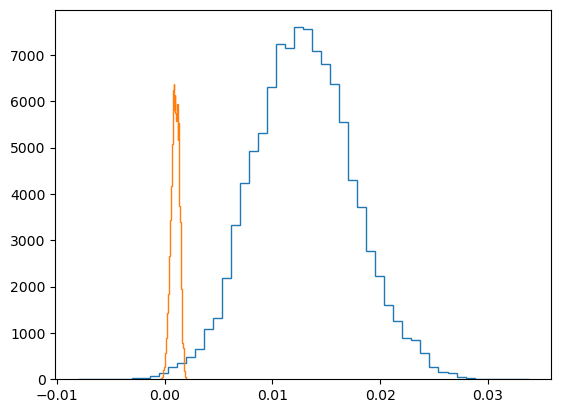

In [2]:
import matplotlib.pyplot as plt
# plt.hist(data['posterior']['content']['beta'], 30);
plt.hist(data_b5['posterior']['content']['beta'], 50, histtype = 'step');
plt.hist(data_b7['posterior']['content']['beta'], 50, histtype = 'step');

In [6]:
beta_b5 = data_b5['posterior']['content']['beta']
beta_b7 = data_b7['posterior']['content']['beta']
chirp_mass_b5 = data_b5['posterior']['content']['chirp_mass']
mass1_b5 = np.array(data_b5['posterior']['content']['mass_1'])
mass2_b5 = np.array(data_b5['posterior']['content']['mass_2'])


delta_eps_b5 = data_b5['posterior']['content']['delta_eps']
delta_eps_b7 = data_b7['posterior']['content']['delta_eps']
chirp_mass_b7 = data_b7['posterior']['content']['chirp_mass']
mass1_b7 = np.array(data_b7['posterior']['content']['mass_1'])
mass2_b7 = np.array(data_b7['posterior']['content']['mass_2'])

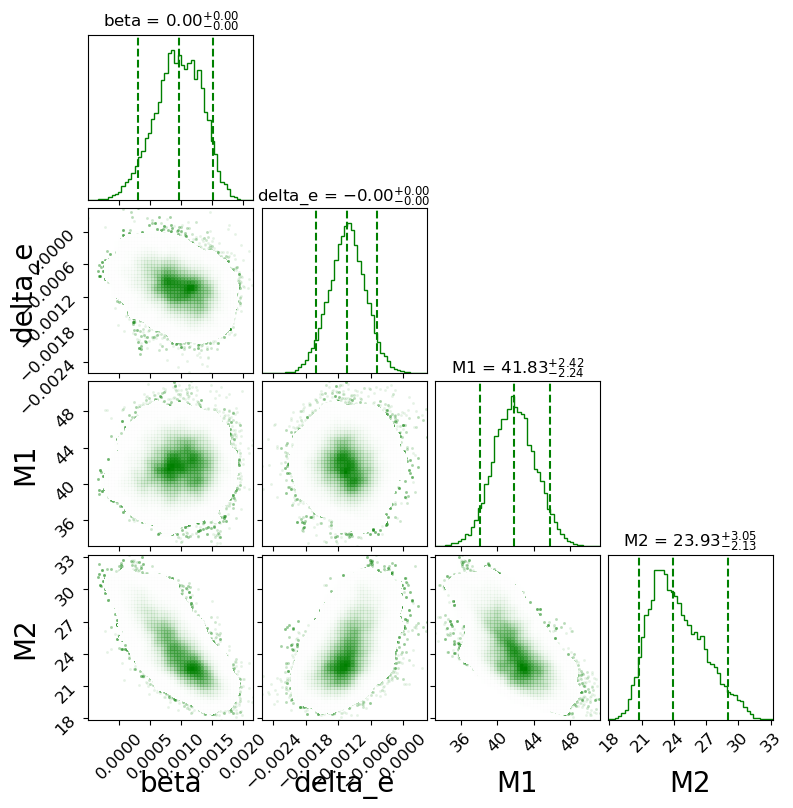

In [7]:
import corner
import numpy as np
# figure, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.rcParams.update({'font.size': 12})

fig = corner.corner(np.vstack([beta_b7, delta_eps_b7, mass1_b7, mass2_b7]).T, labels=['beta', 'delta_e', 'M1', 'M2'], title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], show_titles=True, smooth = True,  bins=50, plot_contours=False, fill_contours=True, levels=[0.99], color="g",
                   hist_kwargs={"linewidth": 1, "histtype": "step"}, contour_kwargs={"colors": ["r", "b"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, ticklabel_kwargs= {"fontsize": 10})

fig.set_size_inches(8, 8)

/home/akash.mishra/miniconda3/envs/igwn-py38/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/akash.mishra/miniconda3/envs/igwn-py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


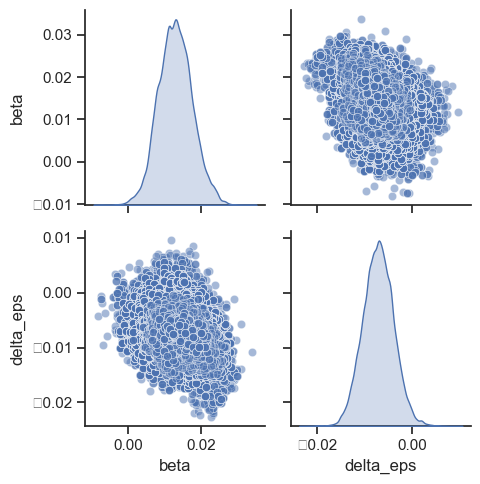

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with your data
data = pd.DataFrame({
    'beta': beta_b5,
    'delta_eps': delta_eps_b5,
    
})

# Create a corner plot using seaborn
sns.set(style='ticks')
g = sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})



# Adjust plot settings if needed
plt.tight_layout()

# Show the plot
plt.show()


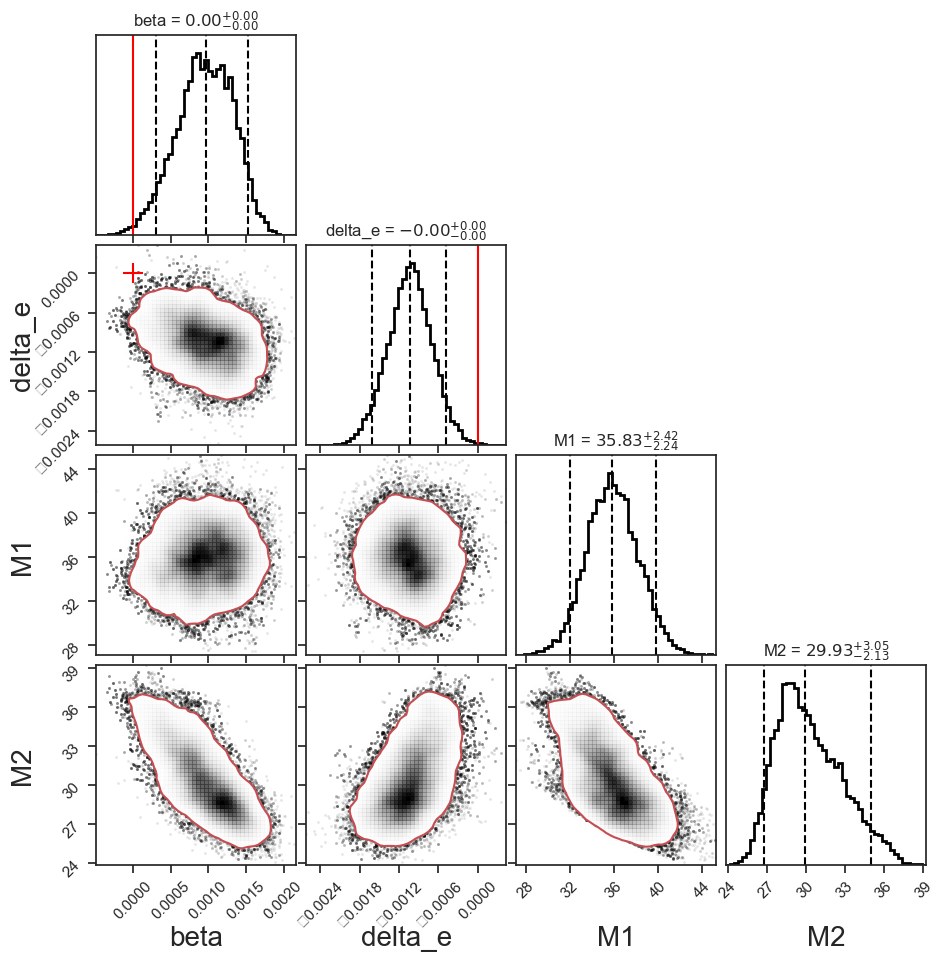

In [11]:
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Your code to create the corner plot
np.set_printoptions(precision=4)

fig = corner.corner(np.vstack([beta_b7, delta_eps_b7, mass1_b7-6, mass2_b7+6]).T, labels=['beta', 'delta_e', "M1", "M2"], 
                    title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], 
                    show_titles=True, smooth=True, bins=50, plot_contours=True, fill_contours=False, 
                    levels=[0.95], color="black", hist_kwargs={"linewidth": 2, "histtype": "step"}, 
                    contour_kwargs={"colors": ["r"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, 
                    ticklabel_kwargs={"fontsize": 10}, precision=10)


fig.axes[4].scatter(0.0, 0.0, marker='+', color='red', label='True values', s=200)
fig.axes[5].axvline(0.0, color='red', label='True values')
fig.axes[0].axvline(0.0, color='red', label='True values')
# Change the labels on the corner plot


plt.show()


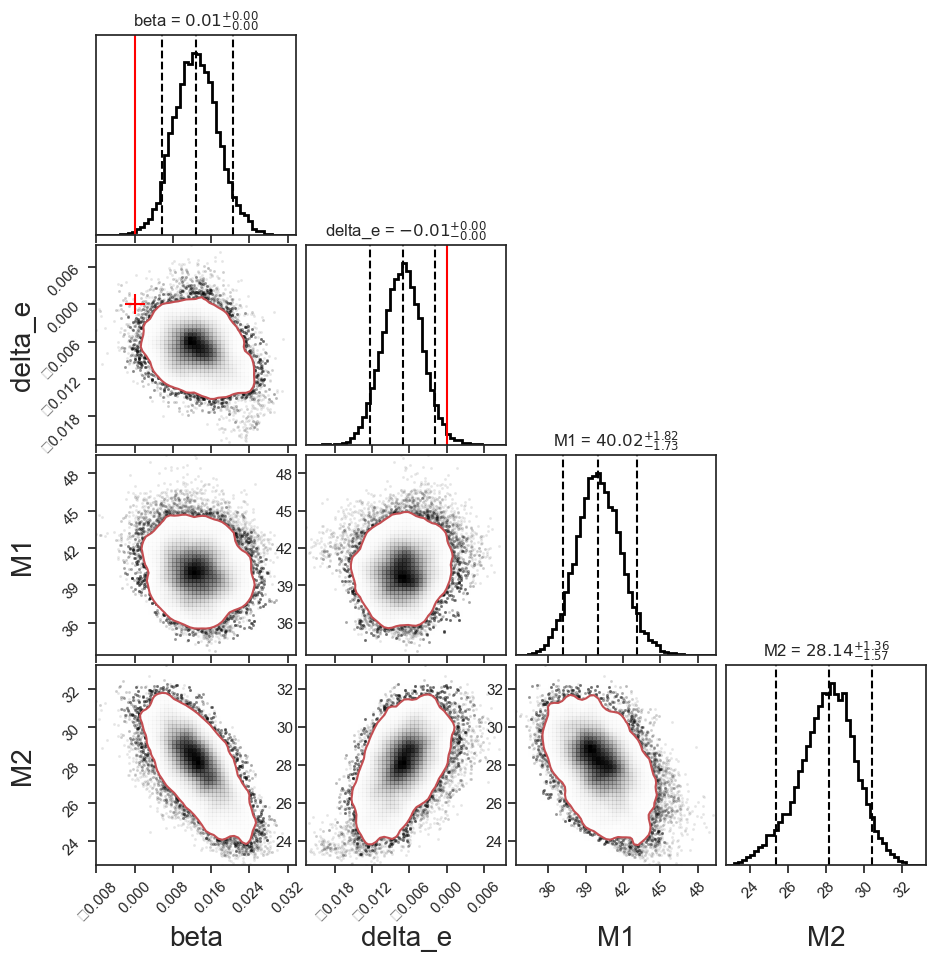

In [18]:
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Your code to create the corner plot
np.set_printoptions(precision=4)

fig = corner.corner(np.vstack([beta_b5, delta_eps_b5, mass1_b5-5, mass2_b5+5]).T, labels=['beta', 'delta_e', "M1", "M2"], 
                    title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], 
                    show_titles=True, smooth=True, bins=50, plot_contours=True, fill_contours=False, 
                    levels=[0.95], color="black", hist_kwargs={"linewidth": 2, "histtype": "step"}, 
                    contour_kwargs={"colors": ["r"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, 
                    ticklabel_kwargs={"fontsize": 10}, precision=10)

fig.axes[4].scatter(0.0, 0.0, marker='+', color='red', label='True values', s=200)
fig.axes[5].axvline(0.0, color='red', label='True values')
fig.axes[0].axvline(0.0, color='red', label='True values')
# Change the labels on the corner plot
for ax in fig.get_axes():
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))

plt.show()



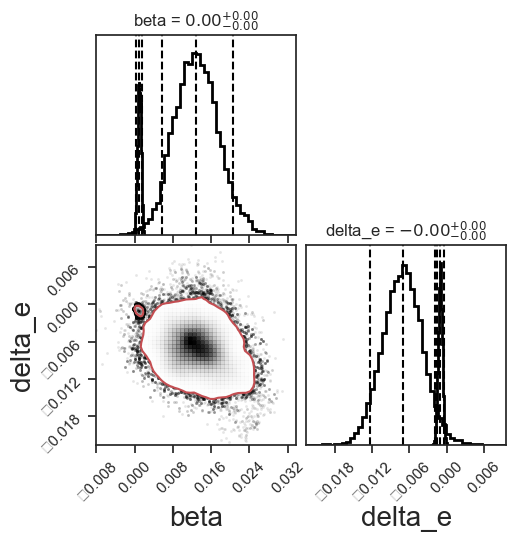

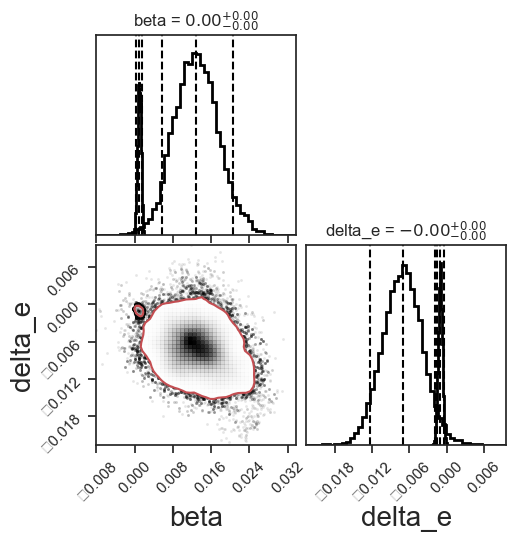

In [21]:
samples = np.vstack([beta_b5, delta_eps_b5]).T
samples2 = np.vstack([beta_b7, delta_eps_b7]).T

fig = corner.corner(np.vstack([beta_b5, delta_eps_b5]).T, labels=['beta', 'delta_e'], 
                    title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], 
                    show_titles=True, smooth=True, bins=50, plot_contours=True, fill_contours=False, 
                    levels=[0.95], color="black", hist_kwargs={"linewidth": 2, "histtype": "step"}, 
                    contour_kwargs={"colors": ["r"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, 
                    ticklabel_kwargs={"fontsize": 10}, precision=10)
corner.corner(samples2,fig=fig, labels=['beta', 'delta_e'], 
                    title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], 
                    show_titles=True, smooth=True, bins=50, plot_contours=True, fill_contours=False, 
                    levels=[0.95], color="black", hist_kwargs={"linewidth": 2, "histtype": "step"}, 
                    contour_kwargs={"colors": ["r"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, 
                    ticklabel_kwargs={"fontsize": 10}, precision=10)

# Results PE Runs

In [1]:
import json

with open('/mnt/pfs/akash.mishra/ppe_model/job_files/GW150914/b_4/results_b4_updated/GW150914_result.json', 'r') as file:
    # Load the JSON data
    data_b4 = json.load(file)
    
with open('/mnt/pfs/akash.mishra/ppe_model/job_files/GW150914/b_5/results_b5_updated/GW150914_result.json', 'r') as file:
    # Load the JSON data
    data_b5 = json.load(file) 

with open('/mnt/pfs/akash.mishra/ppe_model/job_files/GW150914/b_7/results_b7_updated/GW150914_result.json', 'r') as file:
    # Load the JSON data
    data_b7 = json.load(file)

In [2]:
import numpy as np

beta_b4 = data_b4['posterior']['content']['beta']
beta_b5 = data_b5['posterior']['content']['beta']
beta_b7 = data_b7['posterior']['content']['beta']


eps_b4 = data_b4['posterior']['content']['delta_eps']
eps_b5 = data_b5['posterior']['content']['delta_eps']
eps_b7 = data_b7['posterior']['content']['delta_eps']


chirp_mass_b4 = data_b4['posterior']['content']['chirp_mass']
chirp_mass_b5 = data_b5['posterior']['content']['chirp_mass']
chirp_mass_b7 = data_b7['posterior']['content']['chirp_mass']


mass1_b4 = np.array(data_b4['posterior']['content']['mass_1'])
mass1_b5 = np.array(data_b5['posterior']['content']['mass_1'])
mass1_b7 = np.array(data_b7['posterior']['content']['mass_1'])


mass2_b4 = np.array(data_b4['posterior']['content']['mass_1'])
mass2_b5 = np.array(data_b5['posterior']['content']['mass_1'])
mass2_b7 = np.array(data_b7['posterior']['content']['mass_1'])

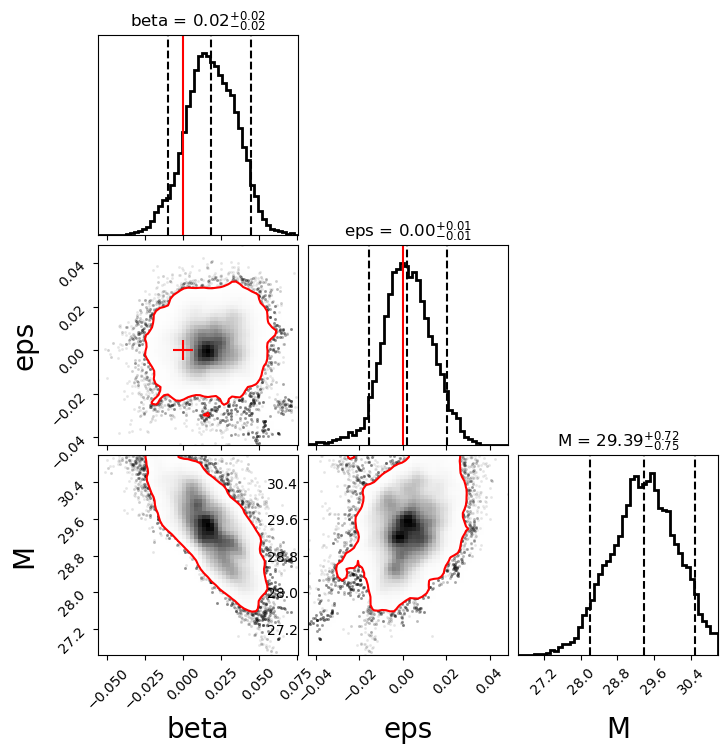

In [19]:
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Your code to create the corner plot
np.set_printoptions(precision=4)

fig = corner.corner(np.vstack([beta_b4, eps_b4, chirp_mass_b4]).T, labels=['beta', 'eps', 'M'], 
                    title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], 
                    show_titles=True, smooth=True, bins=50, plot_contours=True, fill_contours=False, 
                    levels=[0.95], color="black", hist_kwargs={"linewidth": 2, "histtype": "step"}, 
                    contour_kwargs={"colors": ["r"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, 
                    ticklabel_kwargs={"fontsize": 10}, precision=10)

fig.axes[3].scatter(0.0, 0.0, marker='+', color='red', label='True values', s=200)
fig.axes[4].axvline(0.0, color='red', label='True values')
fig.axes[0].axvline(0.0, color='red', label='True values')
# Change the labels on the corner plot
for ax in fig.get_axes():
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))

plt.show()

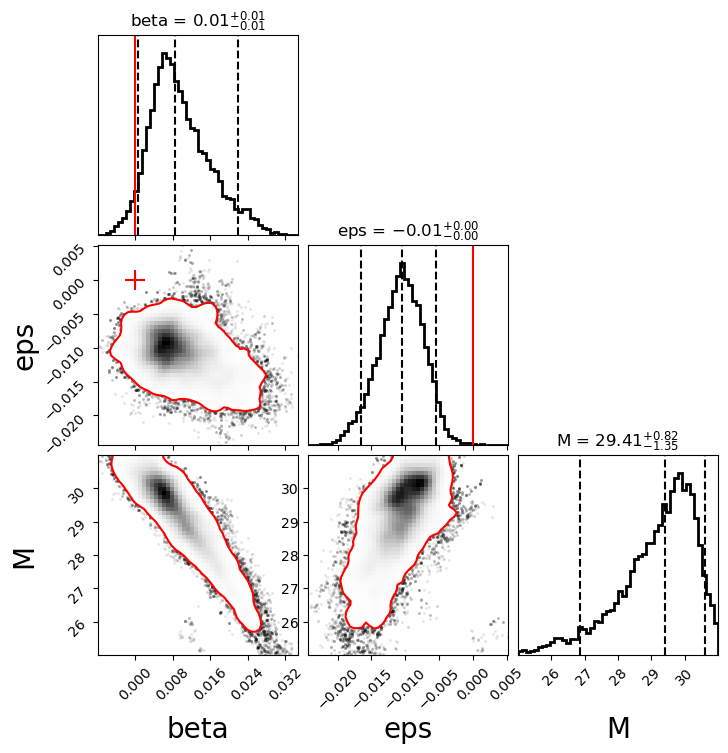

In [22]:
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Your code to create the corner plot
np.set_printoptions(precision=4)

fig = corner.corner(np.vstack([beta_b5, eps_b5, chirp_mass_b5]).T, labels=['beta', 'eps', 'M'], 
                    title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], 
                    show_titles=True, smooth=True, bins=50, plot_contours=True, fill_contours=False, 
                    levels=[0.95], color="black", hist_kwargs={"linewidth": 2, "histtype": "step"}, 
                    contour_kwargs={"colors": ["r"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, 
                    ticklabel_kwargs={"fontsize": 10}, precision=10)

fig.axes[3].scatter(0.0, 0.0, marker='+', color='red', label='True values', s=200)
fig.axes[4].axvline(0.0, color='red', label='True values')
fig.axes[0].axvline(0.0, color='red', label='True values')
# Change the labels on the corner plot
for ax in fig.get_axes():
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))

plt.show()

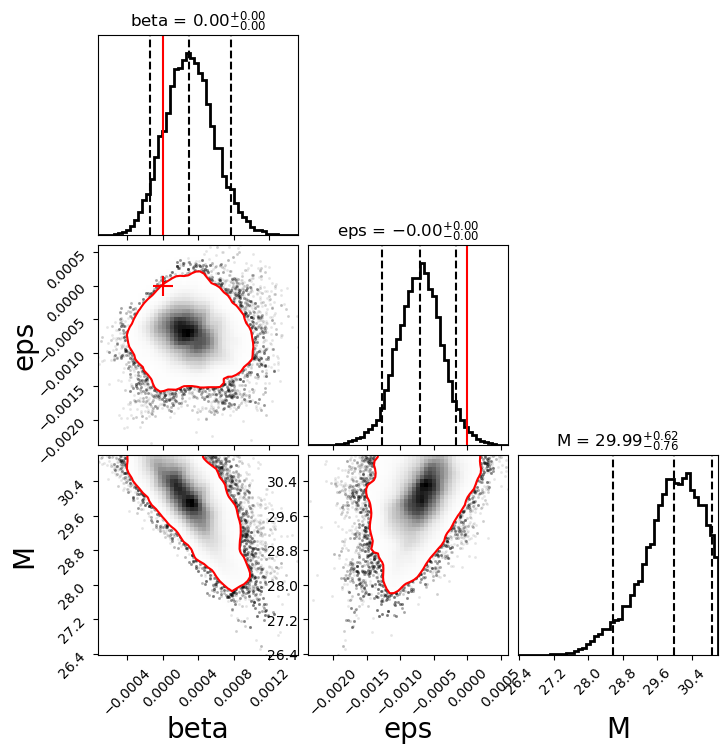

In [23]:
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Your code to create the corner plot
np.set_printoptions(precision=4)

fig = corner.corner(np.vstack([beta_b7, eps_b7, chirp_mass_b7]).T, labels=['beta', 'eps', 'M'], 
                    title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 20}, quantiles=[0.05, 0.5, 0.95], 
                    show_titles=True, smooth=True, bins=50, plot_contours=True, fill_contours=False, 
                    levels=[0.95], color="black", hist_kwargs={"linewidth": 2, "histtype": "step"}, 
                    contour_kwargs={"colors": ["r"]}, fig_kwargs={"figsize": (20, 16)}, max_n_ticks=6, 
                    ticklabel_kwargs={"fontsize": 10}, precision=10)

fig.axes[3].scatter(0.0, 0.0, marker='+', color='red', label='True values', s=200)
fig.axes[4].axvline(0.0, color='red', label='True values')
fig.axes[0].axvline(0.0, color='red', label='True values')
# Change the labels on the corner plot
for ax in fig.get_axes():
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))

plt.show()


# Real Data Test

In [3]:
import json

# Open the JSON file
with open('/mnt/pfs/akash.mishra/ppe_model/job_files/GW150914/dynamical_b/results/GW150914_result.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

In [4]:
delta_eps = data['posterior']['content']['delta_eps']
beta = data['posterior']['content']['beta']
b = data['posterior']['content']['b']

In [5]:
b

[0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 0.0

In [9]:
import bilby

In [10]:
def ppe_c1_eps_model(frequency_array, mass_1, mass_2, a_1, a_2, tilt_1, tilt_2, luminosity_distance, theta_jn, phi_12, phi_jl, phase, A, p, dt_echo, alpha, N, R, **kwargs):
    
    reference_frequency = kwargs.get('reference_frequency', 50.0)
    kwargs['waveform_approximant'] = 'IMRPhenomPv2'
    ht_gr = lal_binary_black_hole(frequency_array, mass_1, mass_2, luminosity_distance,a_1, tilt_1, phi_12, a_2, tilt_2, phi_jl, theta_jn, phase, **kwargs)
    
    hptilde, hctilde = ht_gr["plus"], ht_gr["cross"]
    correction = [ModifiedTerm(f, A, p, dt_echo, alpha, mass_1, a_1, N, R) for f in frequency_array]
    hp_echo = hptilde*correction
    hc_echo = hctilde*correction
    
    #this reassignment ensures the beta_eps correction as extension of beta_c1 correction
    
    
    #phase_term = np.zeros(len(frequency_array))

    #inspiral phase
    #phase_term[1:f_im_index] = inspiral_phase(beta, b, u[1:f_im_index]) -post_inspiral_phase(beta, b, eps, u[1:f_im_index], u_im) 
  
    
    
    # #complete ppe term
    # ppe_term = (1 + amp_term) * np.exp(1j * phase_term)
    # #print(ppe_term)    
    # hptilde = hptilde * ppe_term
    # hctilde = hctilde * ppe_term
    
    return dict(plus=hp_echo, cross=hc_echo)




In [11]:
waveform_arguments = dict(waveform_approximant='IMRPhenomD',reference_frequency=20., minimum_frequency=20.)
sampling_frequency=2048
duration=8
waveform_generator_echo = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=ppe_c1_eps_model,parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,waveform_arguments=waveform_arguments)



03:20 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.ppe_c1_eps_model
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
